In [557]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import datetime
import math

In [558]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

In [559]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)
    
def calculate_rmse(actual_values,predictions):
    mse= mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

In [560]:
#airquality_data = pd.read_csv('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/Bugolobi(ambrosoli)/bugolobi.csv')

root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Makerere','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Mulago','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir, 'Makindye','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)', 'one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Lubowa','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Lubowa','one_feature')
#sensor_type = 0

#airquality_data = pd.read_csv(os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)','one_feature')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir,'Rubaga_Kabusu','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Rubaga_Kabusu','one_feature')
#sensor_type = 1

#airquality_data = pd.read_csv(os.path.join(base_dir,'Kireka','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Kireka','one_feature')
#sensor_type = 1

airquality_data = pd.read_csv(os.path.join(base_dir, 'Nsambya(American_Embassy)','merged_hourly_airquality_greenness_meteorological_dataset.csv '))
filepath = os.path.join(base_dir, 'Nsambya(American_Embassy)','one_feature')
sensor_type = 2

airquality_data.head(10)

,TimeStamp,PM2.5(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09 18:00:00,48.0,18,0.2018,0.3719,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
1,2017-09-09 19:00:00,46.0,19,0.2018,0.3719,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2,2017-09-09 20:00:00,69.0,20,0.2018,0.3719,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
3,2017-09-09 21:00:00,84.0,21,0.2018,0.3719,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
4,2017-09-09 22:00:00,83.0,22,0.2018,0.3719,87,0.0,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0
5,2017-09-09 23:00:00,138.0,23,0.2018,0.3719,90,0.0,87.77,0.0,20.30,0.46,0,0,0,0,0,1,0,0
6,2017-09-10 00:00:00,126.0,0,0.2018,0.3719,91,0.0,87.74,0.0,20.30,0.59,0,0,0,0,0,1,0,0
7,2017-09-10 01:00:00,63.0,1,0.2018,0.3719,91,0.0,87.67,0.0,20.14,0.99,0,0,0,0,0,1,0,0
8,2017-09-10 02:00:00,53.0,2,0.2018,0.3719,89,0.0,87.63,0.0,20.15,1.19,0,0,0,0,0,1,0,0
9,2017-09-10 03:00:00,48.0,3,0.2018,0.3719,89,0.0,87.59,0.0,19.78,0.69,1,0,0,0,0,0,0,0


In [561]:
airquality_data_copy = airquality_data.copy()
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["TimeStamp"])
airquality_data = airquality_data.set_index('TimeStamp')

In [562]:
if sensor_type == 0:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)','PM1(Ug/m3)','PM10(Ug/m3)'], axis=1)
    
elif sensor_type == 1:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)','PM10(Ug/m3)'], axis=1)
    
elif sensor_type == 2:
    airquality_data_for_selected_features = airquality_data.drop(['hour', 'EVI', 'NDVI',
       'humidity (%)', 'precipitation (mm)', 'pressure (kPa)',
       'radiation (W/m2)', 'windspeed (m/s)',
       'winddirection_E', 'winddirection_N', 'winddirection_NE',
       'winddirection_NW', 'winddirection_S', 'winddirection_SE',
       'winddirection_SW', 'winddirection_W','temperature (oC)'], axis=1)
    
#temperature

In [563]:
airquality_data_for_selected_features.head()

,PM2.5(Ug/m3)
TimeStamp,
2017-09-09 18:00:00,48.0
2017-09-09 19:00:00,46.0
2017-09-09 20:00:00,69.0
2017-09-09 21:00:00,84.0
2017-09-09 22:00:00,83.0


In [564]:
airquality_data_for_selected_features.tail()

,PM2.5(Ug/m3)
TimeStamp,
2018-09-30 20:00:00,60.0
2018-09-30 21:00:00,86.0
2018-09-30 22:00:00,99.0
2018-09-30 23:00:00,100.0
2018-10-01 00:00:00,119.0


In [565]:
show_dataframe_info(airquality_data_for_selected_features)

(7431, 1)
['PM2.5(Ug/m3)']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7431 entries, 2017-09-09 18:00:00 to 2018-10-01 00:00:00
Data columns (total 1 columns):
PM2.5(Ug/m3)    7431 non-null float64
dtypes: float64(1)
memory usage: 116.1 KB

 dataframe info: 
 None

 dataframe column datatypes:
 PM2.5(Ug/m3)    float64
dtype: object


In [566]:
airquality_data_for_selected_features.describe()

,PM2.5(Ug/m3)
count,7431.000000
mean,60.795613
std,34.575160
min,6.000000
25%,35.500000
50%,52.000000
75%,77.000000
max,407.000000


### Separate Features From the Target

In [567]:
airquality_data_for_selected_features.columns

Index(['PM2.5(Ug/m3)'], dtype='object')

In [568]:
airquality_data_for_selected_features = airquality_data_for_selected_features.values


### separate test dataset from training dataset and validation dataset
- separate data on 70/10/20 training/validation/testing


In [569]:
training_data_length = math.floor(len(airquality_data_for_selected_features)* 0.7)
print(training_data_length)

validation_data_length = math.floor(len(airquality_data_for_selected_features)*0.1)
print(validation_data_length)

testing_data_length = math.floor(len(airquality_data_for_selected_features)* 0.2)
print(testing_data_length)

print(str(training_data_length + validation_data_length + testing_data_length ))

5201
743
1486
7430


In [570]:
training_data = airquality_data_for_selected_features[0:training_data_length,:]
print(training_data.shape)

validation_data = airquality_data_for_selected_features[training_data_length:training_data_length+validation_data_length,:]
print(validation_data.shape)

testing_data = airquality_data_for_selected_features[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_data.shape)


(5201, 1)
(743, 1)
(1486, 1)


### Preprocess the data to a format a neural network can ingest.
- Normalising/Scaling data using minmax scaler in sklearn preprocessing for each dataset separately
- Generationg sequential data from the recent past (e.g 3hrs), along with a target pm2.5 value in the future (next day)  for the
  * training dataset
  * validation dataset
  * test dataset

In [571]:
def generate_dataset_in_format_lstm_can_ingest(data, look_back=1):
    x_data, y_data = [], []
    for i in range(len(data)-look_back-1):
        feature_data = data[i:(i+look_back), 0]
        x_data.append(feature_data)
        y_data.append(data[i + look_back, 0])
    return np.array(x_data), np.array(y_data)

In [572]:
def generate_multivariate_dataset_in_format_lstm_can_ingest(data, number_of_inputs, number_of_outputs, dropnan=True):
    number_of_variables = 1 if type(data) is list else data.shape[1]
    data_frame= pd.DataFrame(data)
    columnsx, names = list(),list()
    #generate input sequence (t-n, ... t-1)
    for i in range(number_of_inputs, 0, -1):
        columnsx.append(data_frame.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(number_of_variables)]
       # forecast sequence (t, t+1, ... t+n)
    for i in range(0, number_of_outputs):
        columnsx.append(data_frame.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(number_of_variables)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(number_of_variables)]
            
    aggregated_df = pd.concat(columnsx, axis=1)
    aggregated_df.columns = names
    
    if dropnan:
        aggregated_df.dropna(inplace=True)
    return aggregated_df
    

### given data that goes back a number of timesteps e.g 3hrs, can we predict the next hour.

### training dataset

In [573]:
scaler = MinMaxScaler()
scaled_training_data = scaler.fit_transform(training_data)
# reshape into X=t and Y=t+1 timesteps = lookback
timesteps = 1
number_of_features = 1
scaled_training_features, training_targets = generate_dataset_in_format_lstm_can_ingest(scaled_training_data, timesteps)
# reshape input to [samples, time steps, features]

scaled_training_features_with_original_shape = scaled_training_features
scaled_training_features = np.reshape(scaled_training_features, 
                                      (scaled_training_features.shape[0], timesteps, scaled_training_features.shape[1]))


### validation dataset

In [574]:
scaled_validation_data = scaler.fit_transform(validation_data)
#print(scaled_validation_data)

scaled_validation_features, validation_targets = generate_dataset_in_format_lstm_can_ingest(scaled_validation_data, timesteps)
# reshape input to [samples, time steps, features]
scaled_validation_features = np.reshape(scaled_validation_features, (scaled_validation_features.shape[0], 
                                                                     timesteps, scaled_validation_features.shape[1]))

### Testing dataset

In [575]:
scaled_testing_data = scaler.fit_transform(testing_data)
scaled_testing_features, testing_targets = generate_dataset_in_format_lstm_can_ingest(scaled_testing_data, timesteps)
scaled_testing_features_with_original_shape = scaled_testing_features
scaled_testing_features = np.reshape(scaled_testing_features, (scaled_testing_features.shape[0], 
                                                                     timesteps, scaled_testing_features.shape[1]))

In [576]:
testing_data[0:2]

array([[38.],
       [33.]])

In [577]:
testing_targets[0:2]

array([0.06392694, 0.06392694])

### SUPPORT VECTOR REGRESSION APPROACH
- Training and evaluation on support vector regression approach

In [578]:
scaled_training_features.shape

(5199, 1, 1)

In [579]:
training_targets.shape

(5199,)

In [580]:
scaled_training_features_with_original_shape.shape

(5199, 1)

In [581]:
testing_targets.shape

(1484,)

In [582]:
scaled_testing_targets = testing_targets.reshape(-1,1)
scaled_testing_targets.shape

(1484, 1)

In [583]:
scaled_testing_targets.shape

(1484, 1)

In [584]:
scaled_testing_features_with_original_shape.shape

(1484, 1)

### BASIC LSTM MODOEL
- Training and evaluating on basic lstm model with one layer

In [585]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))



In [586]:
saved_model = load_model(os.path.join(filepath,'basic_lstm_model.h5'),  custom_objects={'rmse': rmse})

basic_lstm_model_train_evaluation = saved_model.evaluate(scaled_training_features, training_targets, verbose=0)
basic_lstm_model_test_evaluation = saved_model.evaluate(scaled_testing_features, testing_targets, verbose=0)
print(basic_lstm_model_train_evaluation)
print(basic_lstm_model_test_evaluation)

[0.0025289737447646825, 0.034299992884746264, 0.046425798960183416]
[0.008432418781375347, 0.06212654782112718, 0.0878564272567911]


In [587]:
basic_lstm_model_predictions = saved_model.predict(scaled_testing_features)
basic_lstm_model_evaluation =  saved_model.evaluate(scaled_training_features, training_targets)
print(basic_lstm_model_evaluation)
print(saved_model.metrics_names)

5199/5199 [==============================] - 0s 64us/step
[0.0025289737447646825, 0.034299992884746264, 0.046425798960183416]
['loss', 'mean_absolute_error', 'rmse']


In [588]:
basic_lstm_testing_targets_unscaled = scaler.inverse_transform(scaled_testing_targets)
basic_lstm_testing_predictions_unscaled = scaler.inverse_transform(basic_lstm_model_predictions)

In [589]:
basic_lstm_rmse = calculate_rmse(basic_lstm_testing_targets_unscaled, basic_lstm_testing_predictions_unscaled)
basic_lstm_mae =  mean_absolute_error(basic_lstm_testing_targets_unscaled, basic_lstm_testing_predictions_unscaled)
print('BASIC LSTM RMSE: ', basic_lstm_rmse.round(2))
print('BASIC LSTM MAE: ', basic_lstm_mae.round(2))

BASIC LSTM RMSE:  20.11
BASIC LSTM MAE:  13.61


In [590]:
print(basic_lstm_model_predictions.shape)
print(basic_lstm_model_predictions.ravel().shape)

(1484, 1)
(1484,)


In [591]:
basic_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': basic_lstm_testing_targets_unscaled.ravel(), 'Predicted PM2.5':basic_lstm_testing_predictions_unscaled.ravel()}) 
basic_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
basic_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'basic_lstm_model_predictions.csv'))

### Making predictions (forecasts) using the deep recurrent lstm
1. Convert test set in the same format accepted by model
1. make the forecasts directly on the testing dataset

### Make prediction and evaluation using the developed deep lstm model

In [592]:
from tensorflow.keras.models import load_model
#saved_best_deep_lstm_model = load_model(os.path.join(filepath,'deep_lstm_best_model.h5'),  custom_objects={'rmse': rmse})
saved_best_deep_lstm_model = load_model(os.path.join(filepath,'airquality_prediction_model.h5'),  custom_objects={'rmse': rmse})
deep_lstm_model_train_evaluation = saved_best_deep_lstm_model.evaluate(scaled_training_features, training_targets, verbose=0)
deep_lstm_model_test_evaluation = saved_best_deep_lstm_model.evaluate(scaled_testing_features, testing_targets, verbose=0)
print(deep_lstm_model_train_evaluation)
print(deep_lstm_model_test_evaluation)

[0.0024029508724045666, 0.032120134894096423, 0.044937324993402646]
[0.008560078833603635, 0.061696925614722016, 0.08834790279762443]


In [593]:
deep_lstm_model_predictions = saved_best_deep_lstm_model.predict(scaled_testing_features)
deep_lstm_model_evaluation =  saved_best_deep_lstm_model.evaluate(scaled_testing_features, testing_targets)


deep_lstm_testing_targets_unscaled = scaler.inverse_transform(scaled_testing_targets)
deep_lstm_testing_predictions_unscaled = scaler.inverse_transform(deep_lstm_model_predictions)

deep_lstm_rmse = calculate_rmse(deep_lstm_testing_targets_unscaled, deep_lstm_testing_predictions_unscaled )
deep_lstm_mae =  mean_absolute_error(deep_lstm_testing_targets_unscaled, deep_lstm_testing_predictions_unscaled )
print('Deep LSTM RMSE: ', deep_lstm_rmse.round(2))
print('Deep LSTM MAE: ', deep_lstm_mae.round(2))

deep_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': deep_lstm_testing_targets_unscaled.ravel(), 'Predicted PM2.5':deep_lstm_model_predictions.ravel()}) 
deep_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
deep_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'deep_lstm_model_predictions.csv'))

1484/1484 [==============================] - 0s 66us/step
Deep LSTM RMSE:  20.26
Deep LSTM MAE:  13.51


### Verification of the average in the results of the forecasts and in the actual results

In [594]:
print('predictions', deep_lstm_testing_predictions_unscaled.mean())
print('actual pm2.5 values', deep_lstm_testing_targets_unscaled.mean())

predictions 62.52011
actual pm2.5 values 66.00134770889488


### Visualization of the predictions and actual values of PM2.5
1. #### using line graph

In [595]:
testing_data_for_plotting =airquality_data_copy.loc[training_data_length+validation_data_length+timesteps+2: training_data_length+validation_data_length+testing_data_length,:]
print(testing_data_for_plotting.shape)
print(testing_targets.shape)
print()

(1484, 19)
(1484,)



In [596]:
testing_data_for_plotting.head(2)

,TimeStamp,PM2.5(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
5947,2018-07-28 18:00:00,41.0,18,0.1877,0.372,77,0.0,87.8,21.53,22.83,0.70,0,0,0,0,1,0,0,0
5948,2018-07-28 19:00:00,42.0,19,0.1877,0.372,82,0.0,87.8,0.17,21.80,0.43,0,0,0,0,0,0,0,1


In [597]:
print(deep_lstm_testing_targets_unscaled.shape)
print(deep_lstm_testing_targets_unscaled[0:3])
print(deep_lstm_testing_predictions_unscaled.shape)
print(deep_lstm_testing_predictions_unscaled[0:3])

(1484, 1)
[[33.]
 [33.]
 [41.]]
(1484, 1)
[[39.580322]
 [35.184288]
 [35.184288]]


In [598]:
actual_pm25_vs_predicted_pm25_dataframe = pd.DataFrame({'TimeStamp':testing_data_for_plotting['TimeStamp'].values, 
                           'Actual PM2.5':testing_targets.ravel(), 'Predicted PM2.5': deep_lstm_model_predictions.ravel()})


actual_pm25_vs_predicted_pm25_dataframe["TimeStamp"] = pd.to_datetime(actual_pm25_vs_predicted_pm25_dataframe["TimeStamp"])
actual_pm25_vs_predicted_pm25_dataframe = actual_pm25_vs_predicted_pm25_dataframe.set_index('TimeStamp')
actual_pm25_vs_predicted_pm25_dataframe.head()

,Actual PM2.5,Predicted PM2.5
TimeStamp,,
2018-07-28 18:00:00,0.063927,0.093974
2018-07-28 19:00:00,0.063927,0.073901
2018-07-28 20:00:00,0.100457,0.073901
2018-07-28 21:00:00,0.105023,0.106172
2018-07-28 22:00:00,0.136986,0.110258


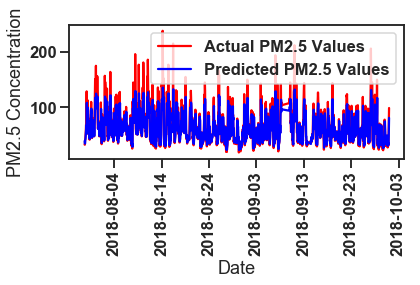

In [599]:
plt.rcParams.update({'font.size':12, 'font.weight':'bold'})
fig_deep_lstm_predictions_vs_actual = plt.figure(figsize=(6,4))
ax_fig_deep_lstm_predictions_vs_actual = fig_deep_lstm_predictions_vs_actual.add_subplot(111)
plt.plot(actual_pm25_vs_predicted_pm25_dataframe.index, deep_lstm_testing_targets_unscaled, color = 'red', label = 'Actual PM2.5 Values')
plt.plot(actual_pm25_vs_predicted_pm25_dataframe.index, deep_lstm_testing_predictions_unscaled, color = 'blue', label = 'Predicted PM2.5 Values')
#plt.title('PM2.5 Values Predictions Vs Actual PM2.5 Values ')
#ax_fig_deep_lstm_predictions_vs_actual.tick_params(axis='both', which='major', labelsize=14)
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.xticks(rotation=90)
ax_fig_deep_lstm_predictions_vs_actual.xaxis.set_major_locator(plt.MaxNLocator(8))
plt.tight_layout()
fig_deep_lstm_predictions_vs_actual.savefig(os.path.join(filepath, 'deep_lstm_model_prediction_vs_actual.png'))